In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/test_bodies.csv', low_memory=False)

In [4]:
pd.set_option('display.max_colwidth', None)
df.head(5)
#номер строки 
#идентификатор новости
#оригинальный текст
#текст после чистки
#текст после обработки PyMystem3

,Unnamed: 0,Body ID,articleBody,articleBody1,articleBody2
0,0,1,"Президент Беларуси Александр Лукашенко заявил, что республика обязана ответить на размещение в Литве американских танков, но “бряцать оружием“ не будет. По словам национального лидера, реакция белорусского общества будет моментальной и чрезвычайно жёсткой.«Если литовские танки под каким-либо предлогом ворвутся на нашу территорию, то белорусы просто забросают их картошкой, как делали дружественные нам сирийцы с американскими танками. Картофеля в Беларуси много – на 4 армии НАТО хватит», - заключил Лукашенко.Танки и боевые машины для американского батальона, который полгода будет дислоцирован на полигоне в Пабраде, прибыли в Литву 21 октября. Ранее в балтийское государство прибыли первые военные батальона. Ожидается, что общее число военнослужащих сухопутных войск США, которые перебрасываются в Литву для сдерживания, обмена опытом и участия в учениях, превысит 500 человек.,",президент беларуси александр лукашенко заявил республика обязана ответить размещение литве американских танков “бряцать оружием“ словам национального лидера реакция белорусского общества моментальной чрезвычайно жёсткой «если литовские танки каким либо предлогом ворвутся нашу территорию белорусы просто забросают картошкой делали дружественные нам сирийцы американскими танками картофеля беларуси – 4 армии нато хватит» заключил лукашенко танки боевые машины американского батальона который полгода дислоцирован полигоне пабраде прибыли литву 21 октября ранее балтийское государство прибыли первые военные батальона ожидается общее число военнослужащих сухопутных войск сша которые перебрасываются литву сдерживания обмена опытом участия учениях превысит 500 человек,президент беларусь александр лукашенко заявлять республика обязанный отвечать размещение литва американский танк бряцать оружие слово национальный лидер реакция белорусский общество моментальный чрезвычайно жесткий литовский танк либо предлог ворваться наш территория белорус просто забросать картошка делать дружественный сириец американский танк картофель беларусь – армия нато хватить заключать лукашенко танк боевой машина американский батальон который полгода дислоцировать полигон пабраде прибыль литва октябрь ранее балтийский государство прибыль первый военный батальон ожидаться общий число военнослужащий сухопутный войско сша который перебрасываться литва сдерживание обмен опыт участие учение превышать человек
1,1,2,"Несколько крупнейших российских компаний оказались в опасности из-за глобального потепления. Как установили аналитики банка Morgan Stanley, серьезную тревогу вызывает потепление в районах вечной мерзлоты, пишет газета «Ведомости». В банке указывают, что климатические изменения в таких регионах приводят к выбросам больших объемов метана и углекислого газа, устойчивость грунта снижается, что в свою очередь становится угрозой для инфраструктуры корпораций. В группу риска аналитики занесли «Газпром», «Новатэк», «Алросу» и «Норникель». В Morgan Stanley подчеркивают, что большая часть добычи палладия, алмазов и газа приходится на районы вечной мерзлоты, поэтому влияние климата может ощутиться уже в ближайшее время. В конце мая на территории ТЭЦ-3 Норильско-Таймырской энергетической компании (НТЭК, дочерняя компания «Норникеля») произошла авария с разливом нефтепродуктов. Среди причин ЧП называют таяние грунтов вечной мерзлоты. В то же время в потеплении в Арктике увидели плюсы. Повышение температуры, по словам ученых, сделает климат в стране более комфортным, может сократиться отопительный сезон, уменьшатся траты на снабжение рабочих мест.",несколько крупнейших российских компаний оказались опасности глобального потепления установили аналитики банка morgan stanley серьезную тревогу вызывает потепление районах вечной мерзлоты пишет газета «ведомости» банке указывают климатические изменения таких регионах приводят выбросам больших объемов метана углекислого газа устойчивость грунта снижается очередь становится угрозой инфраструктуры 

In [4]:
#df.info()

In [5]:
work_df = df.drop(['articleBody1', 'Unnamed: 0', 'Body ID'], axis=1)

In [6]:
work_df.head(5)

,articleBody,articleBody2
0,"Президент Беларуси Александр Лукашенко заявил,...",президент беларусь александр лукашенко заявлят...
1,Несколько крупнейших российских компаний оказа...,несколько крупный российский компания оказыват...
2,Президент Белоруссии Александр Лукашенко объяв...,президент белоруссия александр лукашенко объяв...
3,С начала июля нефтяные компании заметно увелич...,начинать июль нефтяной компания заметно увелич...
4,Псковская область получит 189 миллионов рублей...,псковский область получать миллион рубль ремон...


In [7]:
print('количество новостей для теста:', work_df.shape[0])

количество новостей для теста: 1101


In [8]:
# дублирую просто чтобы проверить как работает поиск дубликатов
work_df = pd.concat([work_df, work_df])
print('количество новостей для теста:', work_df.shape[0])

количество новостей для теста: 2202


In [9]:
print('количество новостей для теста:', work_df.shape)
work_df.head(2)

количество новостей для теста: (2202, 2)


,articleBody,articleBody2
0,"Президент Беларуси Александр Лукашенко заявил,...",президент беларусь александр лукашенко заявлят...
1,Несколько крупнейших российских компаний оказа...,несколько крупный российский компания оказыват...


In [10]:
#ОККККККККК

In [11]:
#давай склепаем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [12]:
#удаляю русские стоп слова (расширить???)
#from nltk.corpus import stopwords
#russian_stopwords = stopwords.words("russian")

In [13]:
#vectorizer = TfidfVectorizer(stop_words=russian_stopwords)
vectorizer = TfidfVectorizer()
#Tf_Idf = vectorizer.fit_transform(work_df['articleBody2'])
Tf_Idf = vectorizer.fit_transform(work_df['articleBody2'])

In [14]:
#количество новостей, количество слов
Tf_Idf.shape

(2202, 17109)

In [15]:
#print(Tf_Idf)

In [16]:
cosine_sim = linear_kernel(Tf_Idf, Tf_Idf)
cosine_sim.shape

(2202, 2202)

In [17]:
def get_duplicates(text_news, title, cosine_sim, top_k=10):
    indices = pd.Series(text_news.index)
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:top_k + 1]
    text_indices = [i[0] for i in sim_scores]
    return list(text_news['articleBody'].iloc[text_indices])
print('Топ-10 новостей по описанию',
      *get_duplicates(work_df, title=4, cosine_sim=cosine_sim, top_k=10), sep='\n, \n')

Топ-10 новостей по описанию
, 
Псковская область получит 189 миллионов рублей на ремонт дорог в рамках национального проекта «Безопасные и качественные автомобильные дороги», сообщает REGNUM со ссылкой на губернатора Михаила Ведерникова. «Деньги пойдут на ремонт дорог в Пскове, Острове и региональных дорог вокруг областного центра», — сказал глава региона. Соответствующее распоряжение было подписано премьер-министром Михаилом Мишустиным. Модернизация региональной дорожной сети — одна из ключевых целей нацпроекта «Безопасные и качественные автомобильные дороги». В его рамках должна вырасти доля автодорог регионального значения до 50,9 процента, будет ликвидирована половина мест концентрации аварий, вдвое увеличена доля протяженности дорог городских агломераций в надлежащем состоянии, на 10 процентов снижена доля перегруженных федеральных и региональных трасс.
, 
Псковская область получит 189 миллионов рублей на ремонт дорог в рамках национального проекта «Безопасные и качественные автом

In [18]:
#df.to_csv('../datasets/Tf_Idf.csv')

In [19]:
#df.to_csv('../datasets/cosine_sim.csv')

In [20]:
from sklearn.cluster import KMeans

In [21]:
#количество категорий, подумаем еще) 
k = 10

In [22]:
model = KMeans(
    n_clusters=k,
    init='k-means++',
    max_iter=100,
    n_init=1)
#потренируем модель на Tf-Idf
model.fit(cosine_sim)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [23]:
labels = model.labels_
#создаем датафрейм, который содержит кластеры, по категориям
mapping = list(zip(labels, work_df.index, work_df['articleBody2']))
clusters = pd.DataFrame(mapping, columns = ['cluster', 'ID', 'articleBody2'])
clusters.head()

,cluster,ID,articleBody2
0,0,0,президент беларусь александр лукашенко заявлят...
1,8,1,несколько крупный российский компания оказыват...
2,0,2,президент белоруссия александр лукашенко объяв...
3,8,3,начинать июль нефтяной компания заметно увелич...
4,8,4,псковский область получать миллион рубль ремон...


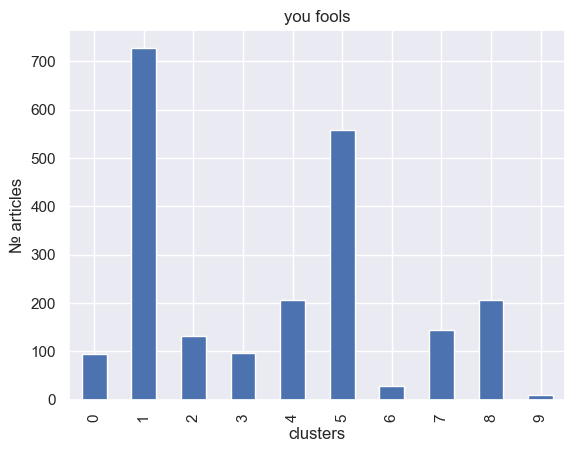

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

clusters.cluster.value_counts().sort_index().plot(kind='bar')
plt.xlabel('clusters')
plt.ylabel('№ articles')
plt.title('you fools')
plt.show()

In [25]:
#находим парочки слов
def find_bigrams (input_list):
    return list(zip(input_list, input_list[1:]))

In [26]:
from collections import Counter 
from nltk.tokenize import word_tokenize

In [27]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [28]:
#удаляю русские стоп слова (расширить???)
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [29]:
#нужно ли, если корректно работает токенизатор? 
#stopwords =  pd.read_csv('../datasets/stop_words_russian.txt', low_memory=False)

In [30]:
my_dict = {}
n_clusters = clusters['cluster'].unique()
for c in n_clusters:
    asset = clusters[clusters['cluster'] == c]
    asset = asset ['articleBody2']
    m_asset = ' '.join(asset)
    tokens = word_tokenize(m_asset, language='russian')
    words = [word for word in tokens if not word in russian_stopwords]
    bigrams = find_bigrams(words)
    bigrams = list(map(' '.join, bigrams))
    counts = Counter(bigrams)
    most_common = counts.most_common(4)
    most_freq = [bigram[0] for bigram in most_common]
    my_dict[c] = ','.join(most_freq)
my_dict

{8: 'александр лукашенко,» —,президент белоруссия,республика беларусь',
 7: '» —,» «,алексей навальный,миллион рубль',
 9: '» —,» «,миллиард рубль,война украина',
 2: '» —,» «,принимать участие,» –',
 6: '» —,кара мурза,уголовный дело,лишение свобода',
 1: 'дональд трамп,» —,президент сша,премьер министр',
 3: '» —,российский военный,мирный житель,крейсер москва',
 4: 'единый россия,» —,» «,государственный дума',
 0: '» —,российский военный,» «,президент украина',
 5: '» —,» «,владимир путин,война украина'}

In [32]:
#надо бы как то кластеры обозвать?
val_count = clusters['cluster'].value_counts()
for i in range (len(val_count)):
    my_dict[i] += f'({val_count[i]})'

In [33]:
my_dict

{8: 'александр лукашенко,» —,президент белоруссия,республика беларусь(106)',
 7: '» —,» «,алексей навальный,миллион рубль(472)',
 9: '» —,» «,миллиард рубль,война украина(194)',
 2: '» —,» «,принимать участие,» –(432)',
 6: '» —,кара мурза,уголовный дело,лишение свобода(140)',
 1: 'дональд трамп,» —,президент сша,премьер министр(300)',
 3: '» —,российский военный,мирный житель,крейсер москва(128)',
 4: 'единый россия,» —,» «,государственный дума(164)',
 0: '» —,российский военный,» «,президент украина(134)',
 5: '» —,» «,владимир путин,война украина(132)'}

In [34]:
from sklearn.decomposition import PCA
# https://www.jcchouinard.com/pca-with-python/ 
# Dimensionality reduction
# Reduce features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(Tf_Idf.toarray())
 
# Reduce centroids to 2D
reduced_centroids = pca.transform(model.cluster_centers_)
 
print('Tf-IDF feature size: ', Tf_Idf.toarray().shape)
print('PCA feature size: ', reduced_features.shape)
print('Tf-IDF cluster centroids size: ', model.cluster_centers_.shape)
print('PCA centroids size: ', reduced_centroids.shape)


ValueError: X has 2202 features, but PCA is expecting 17109 features as input.

In [35]:
#предсказываем кластеры
prediction = model.predict(Tf_Idf)
prediction

ValueError: X has 17109 features, but KMeans is expecting 2202 features as input.

In [37]:
print('количество статей', len(prediction))
print('количество предсказанных кластеров', len(np.unique(prediction)))

количество статей 2202
количество предсказанных кластеров 10


In [38]:
#метки для графика
labels = np.vectorize(my_dict.get)(prediction)

In [39]:
import matplotlib.pyplot as plt

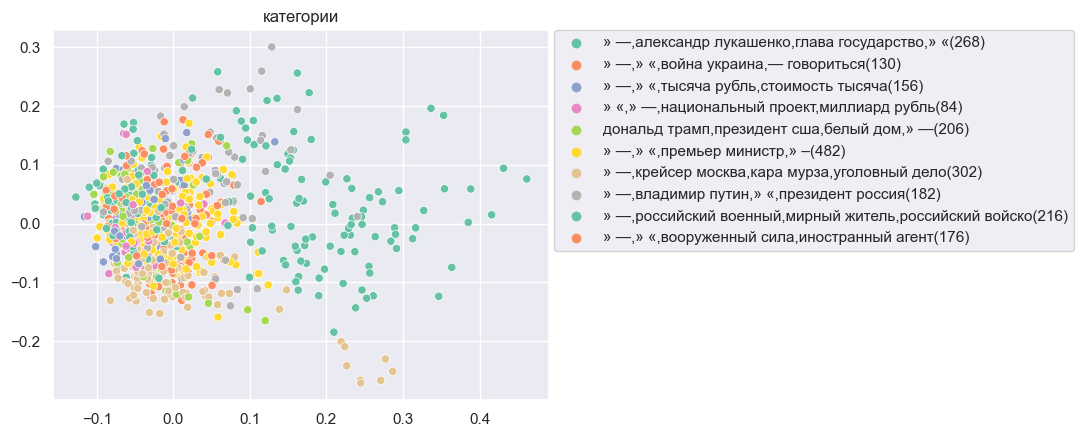

In [42]:
#проверим на графике как это выглядит 
#группировка статей
sns.scatterplot(
    x = reduced_features[:,0], 
    y = reduced_features[:,1],
    hue = labels, 
    palette = 'Set2')

#центры кластеров
#plt.scatter(
   # reduced_features[:,0], 
    #reduced_features[:,1],
    #marker = 'x',
   # s = 150, 
  #  c = 'k')

#график 
plt.legend(bbox_to_anchor = (1.01, 1),
         borderaxespad = 0)
plt.title('категории')
plt.show()

In [47]:
def removeDuplicates(work_df, n):
    if n == 0 or n == 1:
        return n
    arr.sort();
    j = 1
    for i in range(1, n):
        if arr[i] != arr[i-1]:
            arr[j] = arr[i]
            j += 1
    return j

TypeError: sorted expected 1 argument, got 2